# <font color='red'>-- Sunspots observations --</font>
#### Author: Fábio Marane

---
The following project analyses the observational data of sunspots from the year of 1818 to 2019.

Source: https://www.kaggle.com/datasets/abhinand05/daily-sun-spot-data-1818-to-2019/code?select=sunspot_data.csv

---

### <font color='yellow'>Data cleaning</font>

The dataset needs cleanning, as it contains missing values, specially from the first years. It also contains some unnecessary data for this specific project.

- Importing modules:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

- Importing data from csv file: 

In [42]:
df = pd.read_csv('sunspots_data.csv')

df_copy = df.copy()     

- Printing the first 5 rows for first contact:

In [43]:
frows = df_copy.head()

print(frows)

   Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0           0  1818      1    1                  1818.001                  -1   
1           1  1818      1    2                  1818.004                  -1   
2           2  1818      1    3                  1818.007                  -1   
3           3  1818      1    4                  1818.010                  -1   
4           4  1818      1    5                  1818.012                  -1   

   Standard Deviation  Observations  Indicator  
0                -1.0             0          1  
1                -1.0             0          1  
2                -1.0             0          1  
3                -1.0             0          1  
4                -1.0             0          1  


- Dropping "Unnamed: 0" column, as it is not useful;  

- Renaming columns for greater efficiency;  

- Checking all datatypes:

In [44]:
df_copy.drop('Unnamed: 0', inplace = True, axis = 1)

df_copy.columns = ['year', 'month', 'day', 'date_in_fraction', 'num_sunspots', 'std_deviation', 'observations', 'indicator']

print(f'Datatypes: \n{df_copy.dtypes}')

Datatypes: 
year                  int64
month                 int64
day                   int64
date_in_fraction    float64
num_sunspots          int64
std_deviation       float64
observations          int64
indicator             int64
dtype: object


- Saving columns to a list;

- Checking for potential missing data:

In [45]:
df_col = list(df_copy.columns)

miss = df_copy.isnull().mean()
print(f'Missing values: \n{miss}')

Missing values: 
year                0.0
month               0.0
day                 0.0
date_in_fraction    0.0
num_sunspots        0.0
std_deviation       0.0
observations        0.0
indicator           0.0
dtype: float64


- Dropping all data containing "Number of sunspots" = -1, as it is related to missing values:

In [46]:
df_copy = df_copy[df_copy.num_sunspots != -1]

- Dropping the columns 'data_in_fraction' and 'indicator', as they will not be useful for now:

In [47]:
df_copy.drop(['date_in_fraction', 'indicator'], inplace = True, axis = 1)
print(df_copy.head())

    year  month  day  num_sunspots  std_deviation  observations
7   1818      1    8            65           10.2             1
12  1818      1   13            37            7.7             1
16  1818      1   17            77           11.1             1
17  1818      1   18            98           12.6             1
18  1818      1   19           105           13.0             1


### <font color='yellow'>Data Visualization - Plotting and Interpolating</font>

---

- Creating a new dataframe for observations/year:

In [48]:
df_obs_year = df_copy.groupby('year').sum().reset_index()
df_obs_year = df_obs_year.filter(['year', 'observations']).copy()
print(df_obs_year.head())

   year  observations
0  1818           213
1  1819           249
2  1820           224
3  1821           304
4  1822           353


- Assigning both columns to a Numpy array:

In [49]:
observations = df_obs_year['observations'].to_numpy()
years = df_obs_year['year'].to_numpy()

- Finding the year with more observations:

In [50]:
max_obs = np.max(observations)
max_obs_index = np.where(observations == max_obs)
year_max = years[200]
print(f'The year with more observations is {year_max}, with {max_obs} observations.')

The year with more observations is 2018, with 12611 observations.


- Scattered plot of observations/year and cubic interpolation:

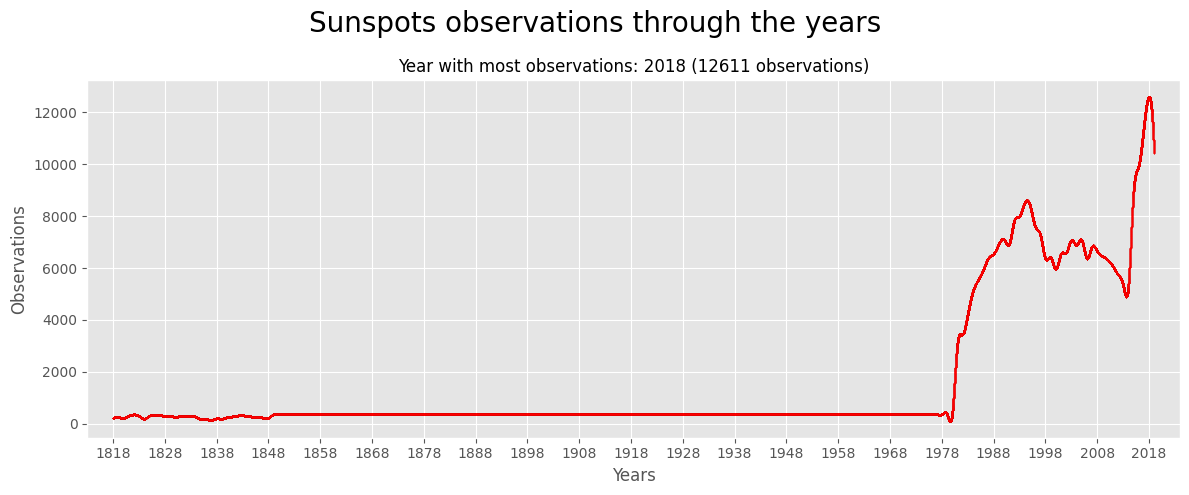

In [134]:
%matplotlib inline
from scipy.interpolate import interp1d

x_data = years
y_data = observations
plt.style.use('ggplot')
plt.suptitle('Sunspots observations through the years', fontsize = 20)
plt.title(f'Year with most observations: {year_max} ({max_obs} observations)', fontsize = 12)
plt.xlabel('Years')
plt.ylabel('Observations')
plt.xticks(np.arange(min(x_data), max(x_data)+1, 10.0))
plt.xlim(min(x_data)-5, max(x_data)+5)
y_f = interp1d(x_data, y_data, 'cubic')
x = np.linspace(1818, 2019, 10**6)
y = y_f(x)
plt.scatter(x, y, s = 0.1, color = 'red')
plt.tight_layout()

<h5>Note: The constantly low number of observations (1) from 1818 to around 1980 is due to the fact that the records only contains data from a single observatory, located at Zurich/Switzerland, at this period. </h5>

- Creating a new dataframe for sunspots/year:

In [88]:
df_sunspots_year = df_copy.groupby('year').sum().reset_index()
df_sunspots_year = df_sunspots_year.filter(['year', 'num_sunspots']).copy()
print(df_sunspots_year.head())

   year  num_sunspots
0  1818         11276
1  1819          9595
2  1820          5428
3  1821          2791
4  1822          2208


In [89]:
sunspots = df_sunspots_year['num_sunspots'].to_numpy()
years = df_sunspots_year['year'].to_numpy()

- Finding date of the observation of the largest number of sunspots:

In [98]:
max_sunspots = df_copy.loc[df_copy['num_sunspots'].idxmax()]
max_sunspots_year = int(max_sunspots['year'])
max_sunspots_month = calendar.month_name[int(max_sunspots['month'])]
max_sunspots_day = int(max_sunspots['day'])
max_num_sunspots = int(max_sunspots['num_sunspots'])
print(f"The largest amount of sunspots observed was at {max_sunspots_year}, {max_sunspots_month}-{max_sunspots_day}.")

The largest amount of sunspots observed was at 1870, August-26.


- Scattered plot of sunspots/year:

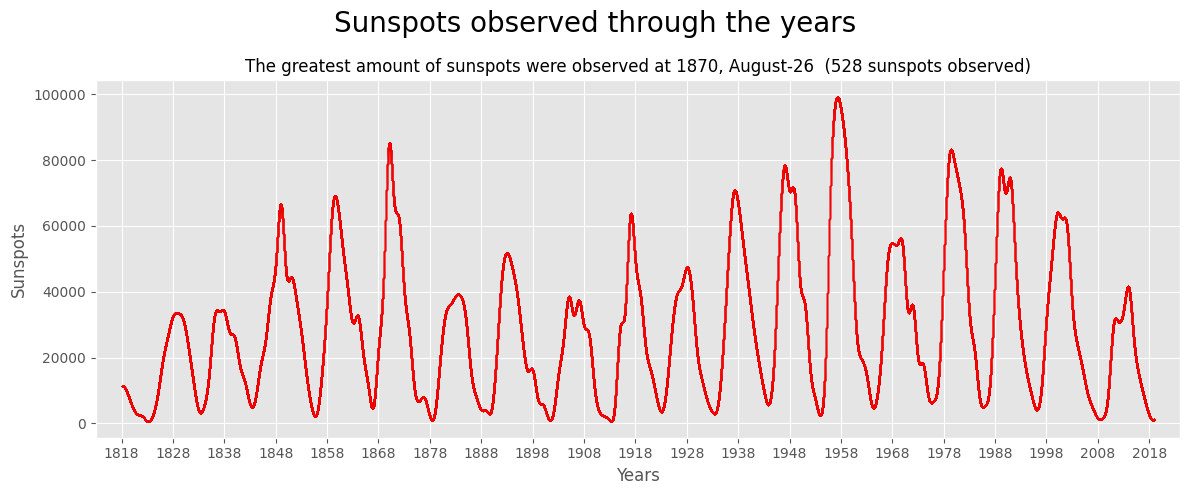

In [135]:
%matplotlib inline
from scipy.interpolate import interp1d

x_data = years
y_data = sunspots
plt.style.use('ggplot')
plt.suptitle('Sunspots observed through the years', fontsize = 20)

plt.title(f'The greatest amount of sunspots were observed at {max_sunspots_year}, {max_sunspots_month}-{max_sunspots_day}  ({max_num_sunspots} sunspots observed)', fontsize = 12)

plt.xlabel('Years')
plt.ylabel('Sunspots')
plt.xticks(np.arange(min(x_data), max(x_data)+1, 10.0))
plt.xlim(min(x_data)-5, max(x_data)+5)
y_f = interp1d(x_data, y_data, 'cubic')
x = np.linspace(1818, 2019, 10**6)
y = y_f(x)
plt.scatter(x, y, s = 0.1, color = 'red')
plt.tight_layout()

<h5>Note: <mark>There are peaks of sunspots observed apparently every ~11 years</mark>. According to NASA (https://spaceplace.nasa.gov/solar-cycles/en/), the Sun's magnetic field goes through 11 years cycles. It is well known that the sunspots are caused by disturbance regions in the Sun's magnetic field. By printing the last 20 rows, we can expect another peak at <mark>2025</mark>, as the last one were at 2014 with 41371 sunspots.</h5>

In [136]:
print(df_sunspots_year[-20:])

     year  num_sunspots
182  2000         63632
183  2001         62199
184  2002         59700
185  2003         36235
186  2004         23913
187  2005         16718
188  2006          9007
189  2007          4615
190  2008          1522
191  2009          1745
192  2010          9077
193  2011         29507
194  2012         30941
195  2013         34318
196  2014         41371
197  2015         25483
198  2016         14575
199  2017          7935
200  2018          2545
201  2019          1264
